<a href="https://colab.research.google.com/github/OleksiiLatypov/Epam_DQE/blob/main/depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s4e11_path = kagglehub.competition_download('playground-series-s4e11')
oleksiilatypov_depression_original_dataset_path = kagglehub.dataset_download('oleksiilatypov/depression-original-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-original-dataset/final_depression_dataset_1.csv
/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
original = pd.read_csv('/kaggle/input/depression-original-dataset/final_depression_dataset_1.csv')

In [ ]:
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')
original.columns = original.columns.str.lower().str.replace(' ', '_')

In [ ]:
train.head()

,id,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
train.head(3)

,id,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [ ]:
original.head(3)

,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No


In [ ]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [ ]:
train.head(3)

,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [ ]:
original['depression'] = (original['depression'] == 'Yes').astype('int')

In [ ]:
original['depression'].value_counts()

depression
0    2101
1     455
Name: count, dtype: int64

In [ ]:
train_origin = pd.concat([train, original], axis=0, ignore_index=True)

In [ ]:
train_origin.shape

(143256, 19)

In [ ]:
train_origin.isna().sum().sort_values(ascending=False)

study_satisfaction                       114857
academic_pressure                        114857
cgpa                                     114856
profession                                37303
work_pressure                             28420
job_satisfaction                          28412
dietary_habits                                4
financial_stress                              4
degree                                        2
family_history_of_mental_illness              0
work/study_hours                              0
have_you_ever_had_suicidal_thoughts_?         0
name                                          0
sleep_duration                                0
gender                                        0
working_professional_or_student               0
city                                          0
age                                           0
depression                                    0
dtype: int64

In [ ]:
(train_origin.isna().sum() / train_origin.shape[0]).sort_values(ascending=False)

study_satisfaction                       0.801760
academic_pressure                        0.801760
cgpa                                     0.801754
profession                               0.260394
work_pressure                            0.198386
job_satisfaction                         0.198330
dietary_habits                           0.000028
financial_stress                         0.000028
degree                                   0.000014
family_history_of_mental_illness         0.000000
work/study_hours                         0.000000
have_you_ever_had_suicidal_thoughts_?    0.000000
name                                     0.000000
sleep_duration                           0.000000
gender                                   0.000000
working_professional_or_student          0.000000
city                                     0.000000
age                                      0.000000
depression                               0.000000
dtype: float64

In [ ]:
train_origin = train_origin.drop('study_satisfaction', axis=1)
train_origin = train_origin.drop('academic_pressure', axis=1)
train_origin = train_origin.drop('cgpa', axis=1)

In [ ]:
miss_values = train_origin.isna().sum()
dict_miss_values = dict(zip(miss_values.index, miss_values))
dict_miss = {k:v for k, v in dict_miss_values.items() if v > 0}
dict_miss

{'profession': 37303,
 'work_pressure': 28420,
 'job_satisfaction': 28412,
 'dietary_habits': 4,
 'degree': 2,
 'financial_stress': 4}

In [ ]:
train_origin.head(3)

,name,gender,age,city,working_professional_or_student,profession,work_pressure,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [ ]:
for col in dict_miss:
    train_origin.loc[:, col] = train_origin.loc[:, col].fillna(train_origin[col].mode()[0])

In [ ]:
train_origin.isna().sum()

name                                     0
gender                                   0
age                                      0
city                                     0
working_professional_or_student          0
profession                               0
work_pressure                            0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64

In [ ]:
train_origin.head(3)

,name,gender,age,city,working_professional_or_student,profession,work_pressure,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,2.0,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [ ]:
train_origin.describe()

,age,work_pressure,job_satisfaction,work/study_hours,financial_stress,depression
count,143256.000000,143256.000000,143256.000000,143256.000000,143256.000000,143256.000000
mean,40.364613,2.801139,2.781733,6.248597,2.988594,0.181647
std,12.383146,1.320395,1.326220,3.852275,1.413654,0.385555
min,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,2.000000,2.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
train_origin.describe(include=['O'])

,name,gender,city,working_professional_or_student,profession,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,family_history_of_mental_illness
count,143256,143256,143256,143256,143256,143256,143256,143256,143256,143256
unique,422,2,98,2,64,36,23,115,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,3204,78797,6683,114853,62531,39432,50541,15006,72445,72069


In [ ]:
train_origin.duplicated().sum()

17

In [ ]:
train_origin.drop_duplicates(inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

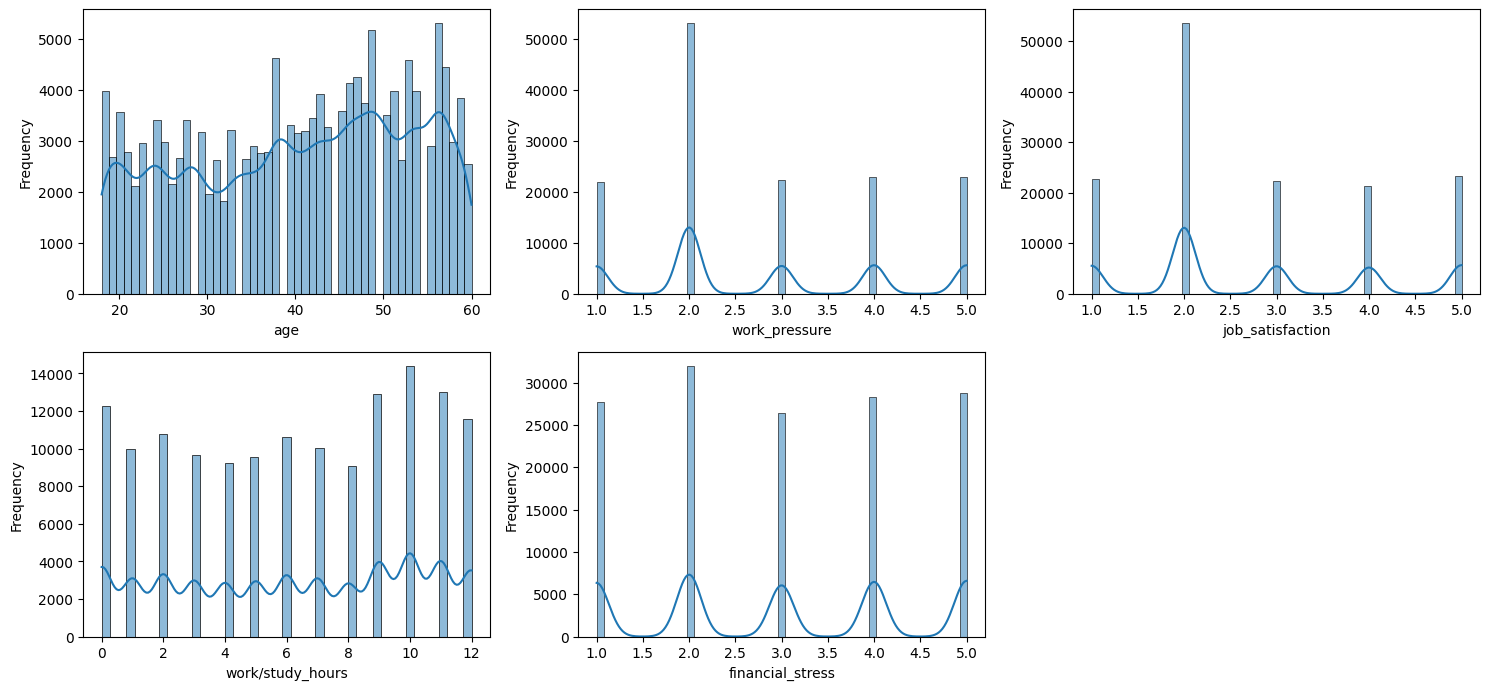

In [ ]:
numerical_features = train_origin.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features.iloc[:, :-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_origin[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: >

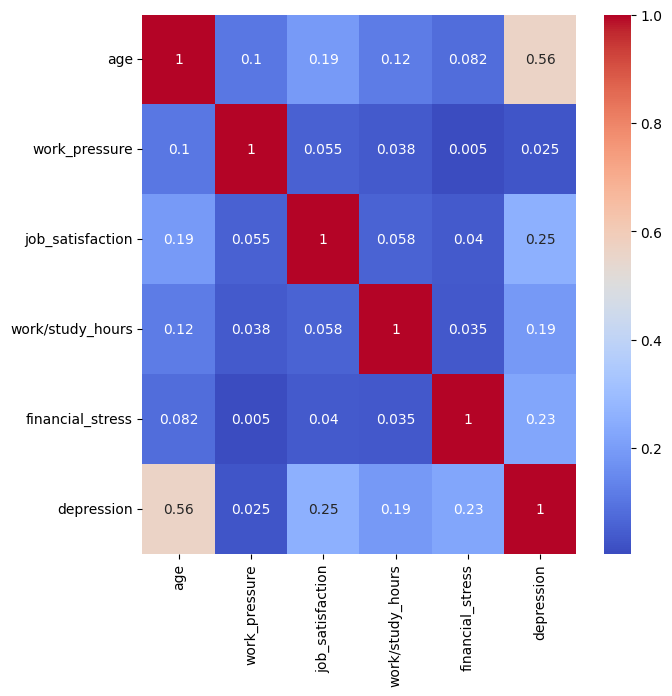

In [ ]:
plt.figure(figsize=(7, 7))
corr_data = numerical_features.corr().abs()
sns.heatmap(corr_data, annot=True, cmap='coolwarm')

In [ ]:
categorical_features = train_origin.select_dtypes(include=['object', 'category'])
categorical_features
res = {}
for col in categorical_features.columns:
    res[f'Column_{col}'] = train_origin[col].unique()
res

{'Column_name': array(['Aaradhya', 'Vivan', 'Yuvraj', 'Rhea', 'Vani', 'Ritvik', 'Rajveer',
        'Aishwarya', 'Simran', 'Utkarsh', 'Aahana', 'Tejas', 'Aadhya',
        'Kiran', 'Aditi', 'Suhani', 'Jiya', 'Bhavesh', 'Armaan', 'Ishaani',
        'Prachi', 'Pratyush', 'Abhinav', 'Siddhesh', 'Aditya', 'Aarav',
        'Asha', 'Kashish', 'Prisha', 'Chhavi', 'Tanmay', 'Vihaan', 'Shiv',
        'Anvi', 'Darsh', 'Samar', 'Raunak', 'Mahi', 'Shaurya', 'Vidya',
        'Jai', 'Ayush', 'Ansh', 'Anand', 'Yashvi', 'Shrey', 'Ritika',
        'Mihir', 'Isha', 'Arjun', 'Rohan', 'Pratham', 'Nirvaan', 'Ishaan',
        'Aarya', 'Riya', 'Aariv', 'Raghavendra', 'Mahika', 'Abhishek',
        'Harshil', 'Janvi', 'Kartikeya', 'Shivam', 'Advait', 'Reyansh',
        'Saanvi', 'Ivaan', 'Pallavi', 'Sneha', 'Ayaan', 'Aakash', 'Raghav',
        'Satyam', 'Aarush', 'Vibha', 'Rupal', 'Sanya', 'Mira', 'Rashi',
        'Shlok', 'Harsha', 'Divya', 'Pranav', 'Hrithik', 'Tushar',
        'Garima', 'Zoya', 'Kian', 'Navya

In [ ]:
original['sleep_duration'].value_counts()

sleep_duration
7-8 hours            658
Less than 5 hours    648
5-6 hours            628
More than 8 hours    622
Name: count, dtype: int64

In [ ]:
train_origin['sleep_duration'].value_counts()

sleep_duration
Less than 5 hours    39426
7-8 hours            37620
More than 8 hours    33345
5-6 hours            32769
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [ ]:
# Step 1: Calculate the mode
mode_value_dietary_habits = train_origin['dietary_habits'].mode()[0]

# Step 2: Define a threshold for rare values
threshold = 50  # You can adjust this threshold based on your criteria

# Step 3: Replace rare values with the mode
# Count occurrences of each value
value_counts = train_origin['dietary_habits'].value_counts()
value_counts
# # Identify rare values
rare_values = value_counts[value_counts < threshold].index
rare_values
# # Replace rare values with the mode
train_origin['dietary_habits'] = train_origin['dietary_habits'].replace(rare_values, mode_value_dietary_habits)

# # Display the updated DataFrame
train_origin['dietary_habits'].value_counts()


dietary_habits
Moderate     50552
Unhealthy    47104
Healthy      45583
Name: count, dtype: int64

In [ ]:
# Step 1: Calculate the mode
mode_value = train_origin['sleep_duration'].mode()[0]

# Step 2: Define a threshold for rare values
threshold = 50  # You can adjust this threshold based on your criteria

# Step 3: Replace rare values with the mode
# Count occurrences of each value
value_counts = train_origin['sleep_duration'].value_counts()
value_counts
# # Identify rare values
rare_values = value_counts[value_counts < threshold].index
rare_values
# # Replace rare values with the mode
train_origin['sleep_duration'] = train_origin['sleep_duration'].replace(rare_values, mode_value)

# # Display the updated DataFrame
train_origin['sleep_duration'].value_counts()


sleep_duration
Less than 5 hours    39505
7-8 hours            37620
More than 8 hours    33345
5-6 hours            32769
Name: count, dtype: int64

In [ ]:
# Step 1: Calculate the mode
mode_value_degree = train_origin['degree'].mode()[0]

# Step 2: Define a threshold for rare values
threshold = 50  # You can adjust this threshold based on your criteria

# Step 3: Replace rare values with the mode
# Count occurrences of each value
value_counts = train_origin['degree'].value_counts()
value_counts
# # Identify rare values
rare_values = value_counts[value_counts < threshold].index
rare_values
# # Replace rare values with the mode
train_origin['degree'] = train_origin['degree'].replace(rare_values, mode_value_degree)

# # Display the updated DataFrame
train_origin['degree'].value_counts()


degree
Class 12    15114
B.Ed        11800
B.Arch       8829
B.Com        8227
B.Pharm      5944
BCA          5842
M.Ed         5749
MCA          5341
BBA          5122
BSc          5121
MSc          4974
LLM          4731
M.Pharm      4622
M.Tech       4560
B.Tech       4496
LLB          4430
BHM          4393
MBA          3912
BA           3838
ME           3716
MD           3457
MHM          3367
BE           3188
PhD          3184
M.Com        3159
MBBS         3157
MA           2966
Name: count, dtype: int64

In [ ]:
# Step 1: Calculate the mode
mode_value_profession = train_origin['profession'].mode()[0]

# Step 2: Define a threshold for rare values
threshold = 50  # You can adjust this threshold based on your criteria

# Step 3: Replace rare values with the mode
# Count occurrences of each value
value_counts = train_origin['profession'].value_counts()
value_counts
# # Identify rare values
rare_values = value_counts[value_counts < threshold].index
rare_values
# # Replace rare values with the mode
train_origin['profession'] = train_origin['profession'].replace(rare_values, mode_value_profession)

# # Display the updated DataFrame
train_origin['profession'].value_counts()


profession
Teacher                   62564
Content Writer             7930
Architect                  4443
Consultant                 4301
HR Manager                 4106
Pharmacist                 3968
Doctor                     3321
Business Analyst           3232
Entrepreneur               3031
Chemist                    3026
Chef                       2921
Educational Consultant     2896
Data Scientist             2432
Researcher                 2373
Lawyer                     2260
Customer Support           2096
Marketing Manager          2015
Pilot                      1952
Travel Consultant          1906
Plumber                    1783
Manager                    1779
Sales Executive            1771
Judge                      1754
Electrician                1615
Financial Analyst          1610
Software Engineer          1544
Civil Engineer             1501
UX/UI Designer             1478
Digital Marketer           1403
Finanancial Analyst        1367
Accountant                 13

In [ ]:
train_origin.shape

(143239, 16)

In [ ]:
train_origin.isnull().sum()

name                                     0
gender                                   0
age                                      0
city                                     0
working_professional_or_student          0
profession                               0
work_pressure                            0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64

In [ ]:
train_origin.shape

(143239, 16)

In [ ]:
train_origin['sleep_duration'].value_counts()

sleep_duration
Less than 5 hours    39505
7-8 hours            37620
More than 8 hours    33345
5-6 hours            32769
Name: count, dtype: int64

In [ ]:
train_origin.shape

(143239, 16)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


categorical_columns = train_origin.select_dtypes(include=['object', 'category']).columns.to_list()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train_origin[categorical_columns] = encoder.fit_transform(train_origin[categorical_columns])
train_origin.head(3)

,name,gender,age,city,working_professional_or_student,profession,work_pressure,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,11.0,0.0,49.0,50.0,1.0,3.0,5.0,2.0,3.0,0.0,9.0,0.0,1.0,2.0,0.0,0
1,407.0,1.0,26.0,93.0,1.0,32.0,4.0,3.0,2.0,2.0,12.0,1.0,7.0,3.0,0.0,1
2,417.0,1.0,33.0,97.0,0.0,32.0,2.0,2.0,0.0,0.0,3.0,1.0,3.0,1.0,0.0,1


In [ ]:
train_origin.depression.value_counts()[1]/train_origin.depression.value_counts()[0]

0.2218734272236392

In [ ]:
test.isna().sum()/len(test)

name                                     0.000000
gender                                   0.000000
age                                      0.000000
city                                     0.000000
working_professional_or_student          0.000000
profession                               0.262601
academic_pressure                        0.799925
work_pressure                            0.200192
cgpa                                     0.799936
study_satisfaction                       0.799925
job_satisfaction                         0.200149
sleep_duration                           0.000000
dietary_habits                           0.000053
degree                                   0.000021
have_you_ever_had_suicidal_thoughts_?    0.000000
work/study_hours                         0.000000
financial_stress                         0.000000
family_history_of_mental_illness         0.000000
dtype: float64

In [ ]:
y = train_origin['depression']
X = train_origin.drop('depression', axis=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

# Model to train
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Lists to store scores
auc_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model_rf.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    y_prob = model_rf.predict_proba(X_test)[:, 1]

    # Get predicted class labels
    y_pred = model_rf.predict(X_test)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Calculate Precision
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'micro' or 'macro' if needed
    precision_scores.append(precision)

    # Calculate Recall
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'micro' or 'macro' if needed
    recall_scores.append(recall)

# Average scores across all folds
print(f"Average AUC: {sum(auc_scores) / len(auc_scores):.4f}")
print(f"Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.4f}")
print(f"Average Precision: {sum(precision_scores) / len(precision_scores):.4f}")
print(f"Average Recall: {sum(recall_scores) / len(recall_scores):.4f}")


Average AUC: 0.9660
Average Accuracy: 0.9276
Average Precision: 0.9260
Average Recall: 0.9276


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score



# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

# Model to train
model_cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6,
                              class_weights=[1, 5],  # Adjust weights if needed
                              random_seed=42,
                              verbose=0)  # Set verbose to 0 to suppress output

# Lists to store scores
auc_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model_cb.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    y_prob = model_cb.predict_proba(X_test)[:, 1]

    # Get predicted class labels
    y_pred = model_cb.predict(X_test)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    print(auc)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(accuracy)

    # Calculate Precision
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'micro' or 'macro' if needed
    precision_scores.append(precision)
    print(precision)

    # Calculate Recall
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'micro' or 'macro' if needed
    recall_scores.append(recall)
    print(recall)

# Average scores across all folds
print(f"Average AUC: {sum(auc_scores) / len(auc_scores):.4f}")
print(f"Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.4f}")
print(f"Average Precision: {sum(precision_scores) / len(precision_scores):.4f}")
print(f"Average Recall: {sum(recall_scores) / len(recall_scores):.4f}")


0.9696246150118509
0.9133970957833007
0.9302142602076285
0.9133970957833007
0.9714242914333928
0.9115470538955599
0.9283507628938283
0.9115470538955599
0.970478270304832
0.9133272828818766
0.9295842046470456
0.9133272828818766
0.9676954558812951
0.9107791119798939
0.9271048869804689
0.9107791119798939
0.9694547243792663
0.9105316438021434
0.9278765644679202
0.9105316438021434
Average AUC: 0.9697
Average Accuracy: 0.9119
Average Precision: 0.9286
Average Recall: 0.9119


In [ ]:
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [ ]:
with open('/kaggle/working/ordinal_encoder.pkl', 'rb') as f:
    ordinal_encoder = pickle.load(f)

In [ ]:
ordinal_encodr

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [ ]:
new_df = train.iloc[:5, :]
cat = new_df.select_dtypes(include=['object', 'category']).columns.to_list()
new_df[cat] = ordinal_encoder.transform(new_df[cat])
new_df.head()

/tmp/ipykernel_30/75164489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[cat] = ordinal_encoder.transform(new_df[cat])


,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,11.0,0.0,49.0,50.0,1.0,3.0,NaN,5.0,NaN,NaN,2.0,3.0,0.0,9.0,0.0,1.0,2.0,0.0,0
1,405.0,1.0,26.0,92.0,1.0,32.0,NaN,4.0,NaN,NaN,3.0,2.0,2.0,12.0,1.0,7.0,3.0,0.0,1
2,415.0,1.0,33.0,96.0,0.0,-1.0,5.0,NaN,8.97,2.0,NaN,0.0,0.0,3.0,1.0,3.0,1.0,0.0,1
3,415.0,1.0,22.0,64.0,1.0,32.0,NaN,5.0,NaN,NaN,1.0,2.0,1.0,6.0,1.0,10.0,1.0,1.0,1
4,285.0,0.0,30.0,37.0,1.0,2.0,NaN,1.0,NaN,NaN,1.0,0.0,2.0,6.0,1.0,9.0,4.0,1.0,0
